# South African Language Identification Hackathon 2022

# Author:Peter Selolo

<img style="float: right" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/800px-Flag_of_South_Africa.svg.png" width="400" height="200" alt="Drawing" style="float: right;"/>


<h3>Table_of_Content</h3>

[<h5>1.Introduction</h5>](#Introduction)

[<h5>2.Problem Statement</h5>](#Problem_Statement)

[<h5>3.Importing Packages</h5>](#Importing_Packages)

[<h5>4.Loading the data</h5>](#Loading_the_data)

[<h5>5.Exploratory data analysis</h5>](#Exploratory_data_analysis)

[<h5>6.Data cleaning and Feature engineering</h5>](#Data_cleaning_and_Feature_engineering)

[<h5>7.Modeling</h5>](#.Modeling)

[<h5>8.Model Performance</h5>](#Model_Performance)

[<h5>9.Model Explanation</h5>](#Model_Explanation)

[<h5>10.Conclussion</h5>](#Conclussion)


<h3>Introduction</h3>

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
Challenges arise when a speaker is trying to address someone in a language they dont understand.

Solution to this kind of problem would be translation by another person who understand multiple languages,but that can still be a challenge of mastering and being fluent in multiple languages.
Machines have always proved to outperform mankind in many activities.Machines can be trained to perform duties on our behalf.

So i will be developing a machine learning model to determine in which of the South African languages the piece of text is written in.

<img style="float: right" src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media" width="400" height="200" alt="Drawing" style="float: right;"/>

<h3>Problem_Statement</h3>

Use natural language processing  identification to develop a model that will take text which is in any of South Africa's 11 Official languages and identify which language the text is in.
The model should perform the task of "determining the natural language that a piece of text is written in."

<h3>Importing_Packages</h3>

In [67]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

#libraries for language,datacleaning and preprocessing libraries
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
import nltk
from nltk.corpus import stopwords
import string
import nltk
import re
import string

#Modelling and feature engineering libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score







<h3>Loading_the_data</h3>

In [68]:
#loading the train dataset
df_train = pd.read_csv('train_set.csv')
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [69]:
#loading the test dataset
df_test=pd.read_csv('test_set.csv')
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [70]:
#loading the submission file
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,index,lang_id
0,1,tsn
1,2,nbl


<h3>Exploratory_data_analysis</h3>

In [71]:
#checking the shape of the dataset 

In [72]:
df_train.shape

(33000, 2)

In [73]:
df_test.shape

(5682, 2)

the train dataset is made up of 33000 raws whereas the dataset consist of only 5682 raws and 2 columns

In [74]:
#checking the datatypes in each of the dataset

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [76]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


from the given data sets we have two types which are numeric and categorical

In [77]:
#Now we will be performing our analysis with only the train dataset since it the one that will be used to train our model

In [78]:
#checking for nulls is the text feature
df_train['text'].isnull().sum()

0

In [79]:
#checking fro nulls in the lang_id feature
df_train['lang_id'].isnull().sum()

0

it appears that there are no nulls in our given features

In [80]:
#check for unique featues
df_train['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

there are eleven langauges in the given data

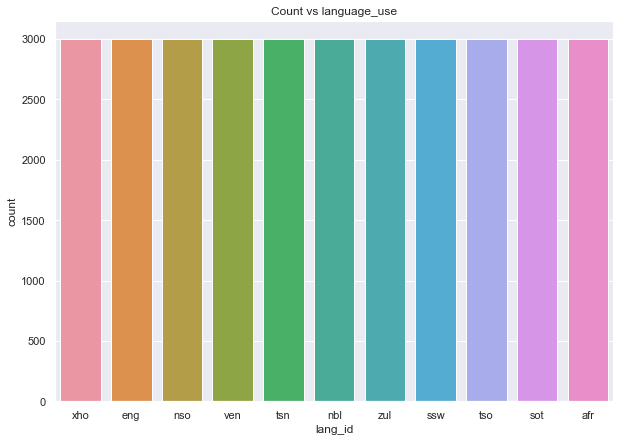

In [81]:
#Now lets see how often they are used

sns.set(rc={'figure.figsize':(10,7)})
ax=sns.countplot(x=df_train['lang_id'], data=df_train)
plt.title("Count vs language_use")
plt.show()

all langauges appear to be used equally.meaning that there is a balance 

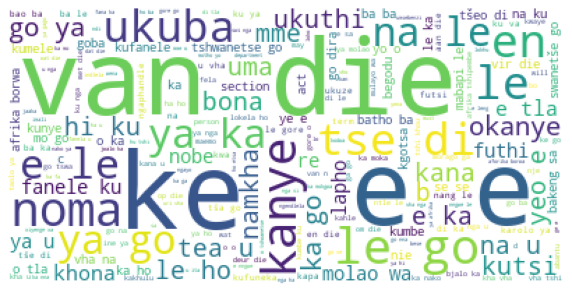

In [82]:
#creating a word cloud to for text
words = " ".join(df_train['text'])

wc = WordCloud(background_color='white')
img = wc.generate(words)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()


from our EDA we observed that our data is balanced and is in a good format,so there is not much of data cleaning required 

<h3>Data_cleaning_and_Feature_engineering</h3>

<h6>data cleaning</h6>

In [ ]:
#our first data cleaning function did not perform better so it was imputed

In [83]:
#this is our second data cleaning function and performs better and cleaning our data in a short time
# Remove special characters numbers and punctuation
df_train['cleaned_text'] = df_train['text'].str.replace('[^a-zA-Z#]', ' ', regex=False)
# Remove special numbers
df_train['cleaned_text'] = df_train['text'].str.replace('[0-9]', ' ', regex=False)
# To lowercase
df_test['cleaned_text'] = df_train['cleaned_text'].str.lower()
df_train.head()

,lang_id,text,cleaned_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [86]:
df_train["cleaned_text"].head()

0    umgaqo-siseko wenza amalungiselelo kumaziko ax...
1    i-dha iya kuba nobulumko bokubeka umsebenzi na...
2    the province of kwazulu-natal department of tr...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: cleaned_text, dtype: object

<h6>feature engineering<h6>

In [106]:
#select the feature and the target variable
X = df_train['cleaned_text']
y = df_train['lang_id']

In [107]:
# Split Data (into Training & Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [108]:
countvectorizer = CountVectorizer()

X_train_CV = countvectorizer.fit_transform(X_train)
X_test_CV = countvectorizer.transform(X_test)

<h3>Modeling</h3>

<h6>Models used:</h6>

* Logistic Regression

* Random Forest Classifier

* KNeighbhors Classifier

* Naive Bayes MultinomialNB classifier

* Stochastic Gradient Descent

* linear Support Vector Classifier

* RBF Support Vector Classifier

In [109]:
#models
lrm = LogisticRegression(max_iter=1000, random_state=42)
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
naive_bayes = MultinomialNB()
sgd = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)
svc1= SVC(kernel='linear')
svc2= SVC(kernel='rbf')

In [110]:
#model fitting
lrm.fit(X_train_CV, y_train)
rfc.fit(X_train_CV, y_train)
knn.fit(X_train_CV, y_train)
naive_bayes.fit(X_train_CV, y_train)
sgd.fit(X_train_CV, y_train)
svc1.fit(X_train_CV, y_train)
svc2.fit(X_train_CV, y_train)


SVC()

In [113]:
#predictions
lrm_pred = lrm.predict(X_test_CV)
rfc_pred =rfc.predict(X_test_CV)
knn_pred = knn.predict(X_test_CV)
naive_pred= naive_bayes.predict(X_test_CV)
sgd_pred = sgd.predict(X_test_CV)
svc1_pred=svc1.predict(X_test_CV)
svc2_pred=svc2.predict(X_test_CV)


<h3>Model_Performance</h3>

We will compare performances of the used model using the F1 Score which is the number of true instances for each label. And we will later on check the confussion matrix of the best performing model

#### Precision

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations

$$ Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} $$

#### Recall

The recall is intuitively the ability of the classifier to find all the positive samples

$$ Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}$$

#### F1 Score
the f1 score is going to be calculated as follows 

$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$

In [115]:
#f1 score is calculated for each model to see how it performs

In [117]:
#LogisticRegression
f1_lrm = f1_score(y_test,lrm_pred, average = 'weighted')
print("The f1_score of the lrm model is: {}".format(f1_lrm))

#KNeighborsClassifier
f1_knn = f1_score(y_test,knn_pred, average = 'weighted')
print("The f1_score of the knn model is: {}".format(f1_knn))

#RandomForestClassifier
f1_rfc= f1_score(y_test, rfc_pred, average = 'weighted')
print("The f1_score of the random forest model is: {}".format(f1_rfc))

#NaiveBayes
f1_naive = f1_score(y_test, naive_pred, average = 'weighted')
print("The f1_score of the naive baye model is: {}".format(f1_naive))

#Stochastic Gradient Descent
f1_sgd = f1_score(y_test, sgd_pred, average = 'weighted')
print("The f1_score of the stochastic gradient descent model is: {}".format(f1_sgd))

#linearSupportVectorClassifier
f1_svc1 = f1_score(y_test, svc1_pred, average = 'weighted')
print("The f1_score of the linear support vector classifier model is: {}".format(f1_svc1))

#RBFSupportVectorClassifier
f1_svc2 = f1_score(y_test, svc2_pred, average = 'weighted')
print("The f1_score of the rbf support vector classifier model is: {}".format(f1_svc2))



The f1_score of the lrm model is: 0.9953003591794534
The f1_score of the knn model is: 0.9223467609000277
The f1_score of the random forest model is: 0.9874357368466107
The f1_score of the naive baye model is: 0.9990913644589728
The f1_score of the stochastic gradient descent model is: 0.9896581315017597
The f1_score of the linear support vector classifier model is: 0.9953058475633837
The f1_score of the rbf support vector classifier model is: 0.9942533035547593


from the f1-scores scores it can be observed that the naive bayes model is having a higher score as compared to other models

In [96]:
Model_scores = {'Model_Name':[
    #'Logistic Regression', 
    'Random Forest Classifier','KNeighbors Classifier','Naive Bayes',
                              'Stochastic Gradient Classifier',
                        'linear Support Vector Classifier','RBF Support Vector Classifier'],
                    'f1-scores':[
                        #f1_lrm,
                        f1_knn,f1_rfc,f1_naive,f1_sgd,f1_svc1,f1_svc2]}
df= pd.DataFrame(Model_scores)
df

,Model_Name,f1-scores
0,Random Forest Classifier,0.922347
1,KNeighbors Classifier,0.987585
2,Naive Bayes,0.999091
3,Stochastic Gradient Classifier,0.990119
4,linear Support Vector Classifier,0.995306
5,RBF Support Vector Classifier,0.994253


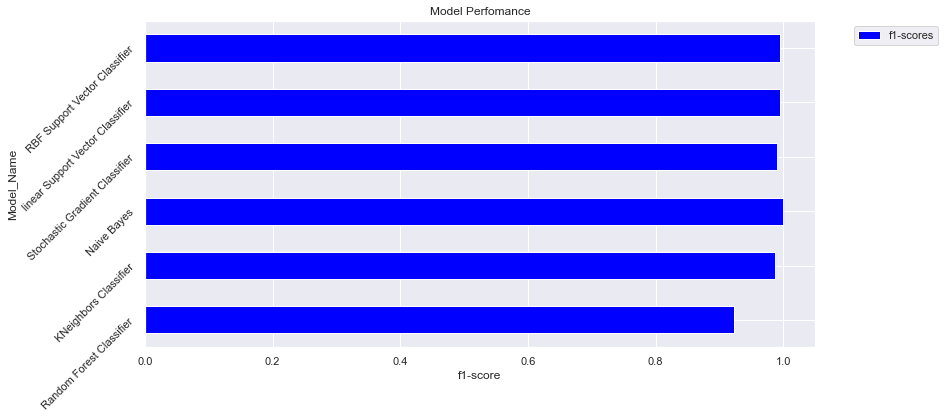

In [97]:
df.set_index(df['Model_Name'], inplace = True)
df.drop(['Model_Name'],axis = 1)
df.plot(kind='barh', figsize = (12,6),colormap='winter')
plt.xlabel('f1-score')
plt.yticks(rotation = 45)
plt.title('Model Perfomance')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

<h3>Model_Explanation</h3>

#We will be explaining our best perfoming model which is the naive bayes

#### Principle of Naive Bayes Classifier:
A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. 
The crux of the classifier is based on the Bayes theorem.

$$ bayes \space theorem $$

$$ P(A|B) = \frac{P(B|A)*P(A)}{P(B)} $$
Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

#### Pros and cons of Naive bayes classifer
They are fast and easy to implement.it is highly scalable with the number of predictors and data points
but their biggest disadvantage is the requirement of predictors to be independent. 
In most of the real life cases, the predictors are dependent, this hinders the performance of this classifier.

<h3>Conclussion</h3>

From the above model comparison it can be observed that the Multonimial Naive Bayes model is the best performing.
It has an f1 score that is greater than the rest and
that makes it our model of choice that we will be using to perform prediction on unseen data.it has proved to be fast 
and easier to train.

<h5>kaggle submission</h5>

In [98]:
# Remove special characters numbers and punctuation
df_test['cleaned_text'] = df_test['text'].str.replace('[^a-zA-Z#]', ' ', regex=False)
# Remove special numbers
df_train['cleaned_text'] = df_train['text'].str.replace('[0-9]', ' ', regex=False)
# To lowercase
df_test['cleaned_text'] = df_test['cleaned_text'].str.lower()
df_test.head()

,index,text,cleaned_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...","mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta.


In [100]:
test_features =df_test['cleaned_text']

In [101]:
test_CV = countvectorizer.transform(test_features)

In [102]:
prediction = naive_bayes.predict(test_CV)

In [103]:
submission = pd.DataFrame(list(zip(df_test['index'], prediction)), columns=['index', 'lang_id'])

In [104]:
submission.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


In [119]:
#convert to csv file
submission.to_csv('submission16.csv', index=False, index_label=False)

[<h5>THE END!!!!!  Back to table of content</h5>](#Table_of_Content)